In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow import keras
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis = 'columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Performing Exploratory Data Analysis:
* In building ML model, CustomerID is useless hence, it is dropped using drop and inplace = True
* Take note of the dtypes, Objects and Floats
* Totalcharges is Object, Monthlycharges is float which isnt supposed to be so
* Totalcharges supposed to be a number column using pd.to_numeric
* Tenure helps to know how many loyal customers there are

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

* I can observe that the TotalCharges is in the form of a string hence, i convert it to numeric

In [6]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()  

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


* I can observe that TotalCharges column is empty

#### Now i find out how many rows are empty:

In [8]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [9]:
df.shape

(7043, 20)

* Since there are only 11 empty rows out of 7043 total rows. Therefore, i drop the empty columns

In [10]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [13]:
# Converting Totalcharges to numeric

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

/var/folders/h5/f4df2x9d25gfb7n8p6xrjs340000gn/T/ipykernel_1444/1405692500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


dtype('float64')

### Loyal Customers (Tenure):

In [14]:
df1[df1.Churn=='No'].head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [15]:
df1[df1.Churn=='Yes'].head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


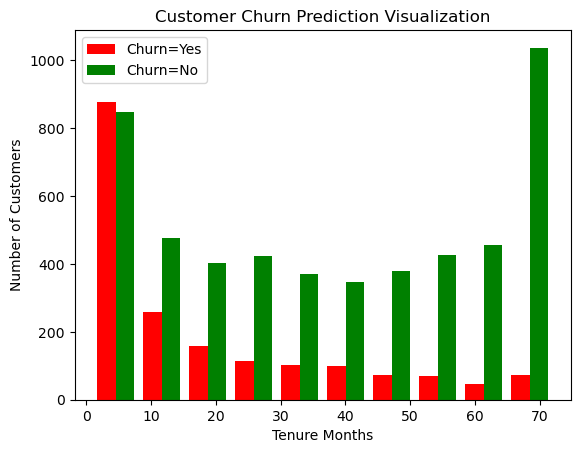

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_no = df1[df1.Churn=='No'].tenure

plt.xlabel("Tenure Months")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()

* #### Observation result is that people with the company for a periods of 70 months, majority are not leaving, that is over 1k customers are not leaving and also, less than 200 customers as the same 70 months tenure left

#### I Plot a churn chart for monthly charges:

In [17]:
df1.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5671,Female,0,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.30,1554.9,No
726,Female,0,No,No,22,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.25,605.9,No


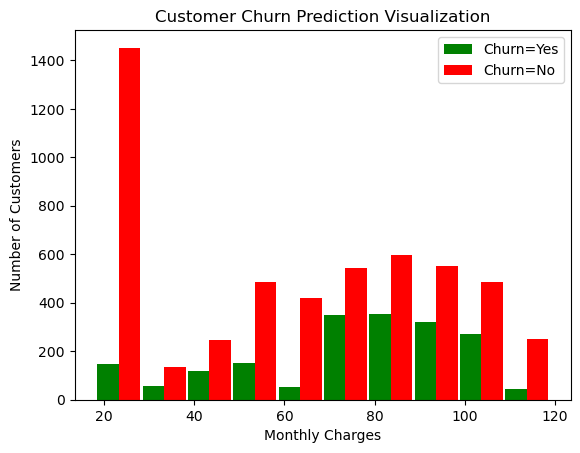

In [18]:
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes, mc_churn_no], color = ['green', 'red'], rwidth = 0.95, label = ['Churn=Yes', 'Churn=No'])
plt.legend()

### Observing the Unique values in each column:

In [19]:
for column in df1:
    print(df1[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [20]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [21]:
for column in df1:
    if df1[column].dtypes == 'object':
        print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
def print_unique_col_values(df1):
    for column in df1:
        if df1[column].dtypes == 'object':
            print(f'{column} : {df1[column].unique()}')

In [23]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### * From my observation, let No internet service = NO
#### * No Phone service = NO
#### * Further, replace Yes and No = 1 and 0 respectively
#### * Then Female and Male to 1 and 0 respectively

In [24]:
df1.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


/var/folders/h5/f4df2x9d25gfb7n8p6xrjs340000gn/T/ipykernel_1444/798622689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)


In [25]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_cols:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)

/var/folders/h5/f4df2x9d25gfb7n8p6xrjs340000gn/T/ipykernel_1444/810612179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)


In [26]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [27]:
df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)
df1['gender'].unique()

/var/folders/h5/f4df2x9d25gfb7n8p6xrjs340000gn/T/ipykernel_1444/4098343554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)


array([1, 0])

#### Applying One Hot Encoding to InternetService, Contract, PaymentMethod columns:

In [28]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4225,0,0,1,0,8,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4014,1,1,0,0,52,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#### Scaling the Monthly charges, Tenure and total charges using MInMaxScaler:

In [31]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5254,0,0,1,1,0.971831,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
5617,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [32]:
for col in df2:
    print (f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

#### Splitting the data:

In [33]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [35]:
x_train.shape, x_test.shape

((5625, 26), (1407, 26))

In [36]:
x_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


* #### Training the model with 50 Epochs

In [37]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
176/176 [==============================] - 2s 4ms/step - loss: 0.5426 - accuracy: 0.7392
Epoch 2/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4497 - accuracy: 0.7874
Epoch 3/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7972
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4209 - accuracy: 0.7980
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.8005
Epoch 6/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4148 - accuracy: 0.8037
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8046
Epoch 8/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8059
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4120 - accuracy: 0.8076
Epoch 10/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8064

In [38]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.7861


[0.4405479431152344, 0.7860696315765381]

* #### Training the model with 100 Epochs to find out if the model will giver a higher accuracy:

In [39]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5786 - accuracy: 0.6683
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4479 - accuracy: 0.7854
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4279 - accuracy: 0.7952
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4202 - accuracy: 0.7986
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4165 - accuracy: 0.7996
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8034
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8057
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4094 - accuracy: 0.8052
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4083 - accura

In [40]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.7832


[0.4528762698173523, 0.783226728439331]

* #### I can observe that between 50 - 100 Epochs gives almost the same accuracy

In [41]:
y_pred = model.predict(x_test)
y_pred[:5]

44/44 [==============================] - 0s 4ms/step


array([[0.2344382 ],
       [0.4254742 ],
       [0.01975258],
       [0.7469826 ],
       [0.41950014]], dtype=float32)

In [42]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [43]:
y_predict = []
for element in y_pred:
    if element > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [44]:
y_predict[:5]

[0, 0, 0, 1, 0]

In [45]:
# Checking model time

def churn_time():
    model = keras.Sequential([
            keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
            keras.layers.Dense(1, activation = 'sigmoid'),
        ])

    model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])
    return model

In [46]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = churn_time()
    cpu_model.fit(x_train, y_train, epochs=1)

176/176 [==============================] - 2s 3ms/step - loss: 0.6180 - accuracy: 0.6453
1.77 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Confusion Matrix:

Text(58.222222222222214, 0.5, 'Truth')

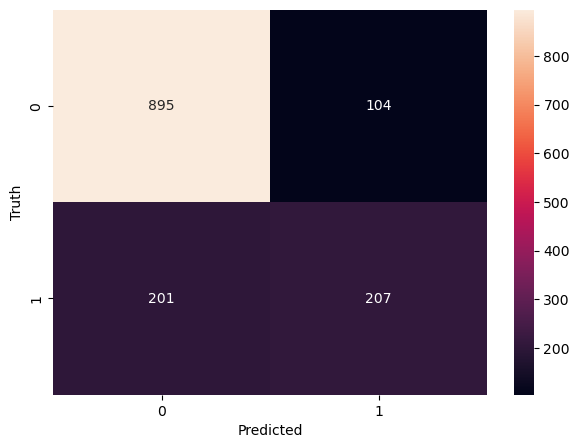

In [47]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize = (7, 5))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Classification Report:

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       999
           1       0.67      0.51      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



## Handling the Imbalanced Data:

 * From the Classification Report above, i can observe imbalance between the "Yes" and "No" values in the Churn column from the F1-score. Hence, the dataset is imbalanced
 
 * The goal of handling the Imbalanced dataset is to improve the F1-score

In [49]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(x_train, y_train, epochs = 100)
    else:
        model.fit(x_train, y_train, epochs = 100, class_weight = weights)
        
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [50]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5216 - accuracy: 0.7317
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4243 - accuracy: 0.7964
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8041
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.8053
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8105
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8068
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8107
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8128
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8135
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4046 - accura

### By Undersamlpling Technique:

In [51]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

* I will take only 408 samples from the 0 class and train the model

In [52]:
# Class count
count_class_0, count_class_1 = df.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [53]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [54]:
# Undersampling 0 class
df_class_0_undersample = df_class_0.sample(count_class_1, random_state=15)

df_test_undersample = pd.concat([df_class_0_undersample,df_class_1], axis = 0)
df_test_undersample.shape

(3738, 27)

In [55]:
print("Random under-sampling:")
print(df_test_undersample.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [56]:
# Creating x and y values

x = df_test_undersample.drop("Churn", axis = 'columns')
y = df_test_undersample["Churn"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15, stratify=y)

In [57]:
y_train.value_counts(), y_test.value_counts()

(0    1495
 1    1495
 Name: Churn, dtype: int64,
 1    374
 0    374
 Name: Churn, dtype: int64)

In [58]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6249 - accuracy: 0.6555
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7572
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7629
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7642
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7622
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7659
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.7635
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7669
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8050
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8124
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.8124
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4047 - accuracy: 0.8140
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8117
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4072 - accuracy: 0.8110
Epoch 89/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4019 - accuracy: 0.8120
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8110
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8090
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.8124
Epoch 93/100


#### *  Using the Under-sampling technique, I can observe the F1 scores for both class 0 and class 1 are the same with a 76% score and 76% accurcay, hence there is a balance between the F1-scores

### By Oversampling Technique:

In [59]:
count_class_0, count_class_1

(5174, 1869)

In [60]:
df_class_1_oversample = df_class_1.sample(count_class_0, replace = True)

df_test_oversample = pd.concat([df_class_0, df_class_1_oversample], axis = 0)
df_test_oversample.shape

(10337, 27)

In [61]:
print("Random Over-sampling:")
print(df_test_oversample.Churn.value_counts())

Random Over-sampling:
1    5174
0    5163
Name: Churn, dtype: int64


In [62]:
x = df_test_undersample.drop("Churn", axis = 'columns')
y = df_test_undersample["Churn"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15, stratify=y)

In [63]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [64]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6190 - accuracy: 0.6572
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.7595
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4945 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7635
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.7635
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7679
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7639
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3914 - accuracy: 0.8167
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3900 - accuracy: 0.8161
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8201
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8221
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.8214
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8191
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.8204
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3866 - accuracy: 0.8224
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8194
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3835 - accuracy: 0.8214
Epoch 93/100


#### * Using the Over-sampling technique, I can observe the F1 scores for both class 0 and class 1 are the same with a 75% score and 75% accurcay, hence there is a balance between the F1-scores

## SMOTE  Technique:

In [65]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [66]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [68]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 15, stratify=y_sm)

In [70]:
y_train.value_counts(), y_test.value_counts()

(1    4130
 0    4130
 Name: Churn, dtype: int64,
 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [71]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5445 - accuracy: 0.7416
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4681 - accuracy: 0.7759
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4595 - accuracy: 0.7814
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4547 - accuracy: 0.7846
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4503 - accuracy: 0.7874
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4470 - accuracy: 0.7886
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.7898
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.7962
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4346 - accuracy: 0.7981
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4319 - accura

#### * Using the SMOTE technique, I can observe the F1 scores for both class 0 and class 1 are 81% and 79% respectively with accuracy of 80%. This indicate close F1-scores, hence there is a balance between the F1-scores

## Ensembling with Undersampling Technique:

In [72]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15, stratify=y)

In [74]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

* To carry out this imbalance technique, I divide the 0 class with the 1 class, 4130/1495
* Divide the 0 class with the solution above to get the number of batches, 4130/3
* Create a function that can run in 3 batches 

In [75]:
4130/1495, 4130/3

(2.762541806020067, 1376.6666666666667)

In [76]:
df3 = x_train.copy()
df3['Churn'] = y_train

In [77]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [78]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [79]:
df_train = pd.concat([df3_class0[:1495], df3_class1], axis = 0)
df_train.shape

(2990, 27)

In [80]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis = 0)
    
    x_train = df_train.drop('Churn', axis = 'columns')
    y_train = df_train.Churn
    
    return x_train, y_train

In [81]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

In [82]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred1 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6040 - accuracy: 0.6890
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7572
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.7649
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4938 - accuracy: 0.7672
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7669
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7709
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.7786
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8144
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8197
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8191
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8151
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8191
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8130
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8197
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8140
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8161
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8187
Epoch 93/100


* The F1-scores in the first batch is not impressive with F1-scores of 78% and 61% for the 0 and 1 class respectively and an accuracy of 72%, hence, I try the second batch

In [83]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)
y_pred2 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.6386 - accuracy: 0.6525
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7502
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.7592
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7592
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7622
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7679
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7669
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7662
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7645
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.7699
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8207
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8224
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8251
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8231
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8274
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8217
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8258
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8251
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8244
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8258
Epoch 93/100


* The F1-scores in the second batch is not impressive with F1-scores of 80% and 58% for the 0 and 1 class respectively and an accuracy of 73%, hence, I try the third batch

In [84]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)
y_pred3 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6016 - accuracy: 0.6892
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7598
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.7681
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7712
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7734
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7791
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7810
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7806
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7860
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7909
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8414
Epoch 84/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3586 - accuracy: 0.8448
Epoch 85/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3609 - accuracy: 0.8417
Epoch 86/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8444
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8417
Epoch 88/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8417
Epoch 89/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.8425
Epoch 90/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8474
Epoch 91/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.8429
Epoch 92/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3529 - accuracy: 0.8459
Epoch 93/100


* The F1-scores in the third batch is not impressive with F1-scores of 75% and 57% for the 0 and 1 class respectively and an accuracy of 69%.

### Majority Vote:

*  The idea behind Majority vote is that anything greater than 1 is the 1 class

In [85]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [86]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.50      0.75      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.75      1407



## Note:

* In summary, the SMOTE Technique had better F1-scores and higher accuracy, hence it is chosen a the best technique to handle the imbalanced data